## How to Perform Correlation Analysis on Stock Data with Python
In this notebook, we'll look at a pair of stocks that are related to examine their correlation. 

From the orginal Medium article: https://medium.com/python-in-plain-english/how-to-perform-correlation-analysis-on-stock-data-with-python-d5609ab9f46c

## Correlation Analysis on Stock Data
Firstly, we start by importing all the necessary libraries and acquire stock data of “AAPL” and “MSFT” using the yFinance library. We'll also import pandas and numpy.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
# we'll look at two tech stocks: microsoft (MSFT) and apple (appl)
tickers = ['MSFT','AAPL']

# start / end data format: yyyy-mm-dd
# we'll download a year's worth of data: 7/1/21 - 6/30/22
stock_data = yf.download(tickers, start='2021-07-01',end='2022-06-30')

[*********************100%***********************]  2 of 2 completed


In [3]:
# examine the stock_data dataframe
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-07-01 to 2022-06-29
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  251 non-null    float64
 1   (Adj Close, MSFT)  251 non-null    float64
 2   (Close, AAPL)      251 non-null    float64
 3   (Close, MSFT)      251 non-null    float64
 4   (High, AAPL)       251 non-null    float64
 5   (High, MSFT)       251 non-null    float64
 6   (Low, AAPL)        251 non-null    float64
 7   (Low, MSFT)        251 non-null    float64
 8   (Open, AAPL)       251 non-null    float64
 9   (Open, MSFT)       251 non-null    float64
 10  (Volume, AAPL)     251 non-null    int64  
 11  (Volume, MSFT)     251 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 25.5 KB


stock_data contains 251 rows across 2 stocks; for each stock we get open, close, adj close, high, low, and volume

In [4]:
stock_data.head(2).round()

Adj Close         Close          High           Low          Open  \
                AAPL   MSFT   AAPL   MSFT   AAPL   MSFT   AAPL   MSFT   AAPL   
Date                                                                           
2021-07-01     136.0  269.0  137.0  272.0  137.0  272.0  136.0  270.0  137.0   
2021-07-02     139.0  275.0  140.0  278.0  140.0  278.0  138.0  272.0  138.0   

                     Volume            
             MSFT      AAPL      MSFT  
Date                                   
2021-07-01  270.0  52485800  16725300  
2021-07-02  273.0  78852600  26458000

In [5]:
# descriptive statistics
stock_data.describe().round()

Adj Close         Close          High           Low          Open  \
           AAPL   MSFT   AAPL   MSFT   AAPL   MSFT   AAPL   MSFT   AAPL   
count     251.0  251.0  251.0  251.0  251.0  251.0  251.0  251.0  251.0   
mean      156.0  296.0  156.0  297.0  158.0  300.0  154.0  294.0  156.0   
std        13.0   23.0   13.0   23.0   13.0   23.0   12.0   24.0   13.0   
min       130.0  242.0  130.0  242.0  132.0  246.0  129.0  242.0  130.0   
25%       146.0  280.0  146.0  282.0  148.0  287.0  145.0  279.0  146.0   
50%       152.0  295.0  153.0  296.0  155.0  299.0  151.0  294.0  153.0   
75%       167.0  309.0  167.0  310.0  170.0  312.0  166.0  307.0  168.0   
max       182.0  342.0  182.0  343.0  183.0  350.0  179.0  342.0  183.0   

                   Volume              
        MSFT         AAPL        MSFT  
count  251.0        251.0       251.0  
mean   297.0   89780962.0  29712267.0  
std     24.0   26741763.0  11097227.0  
min    244.0   41000000.0  13900200.0  
25%    282.0   70867200.0  22431900.0  
50%    296.0   86326000.0  28107300.0  
75%    310.0  104653250.0  34470750.0  
max    345.0  195432700.0  90428900.0

## Visualizing Stock Prices Changes and Returns
Creating a line plot to show the adjusted closing prices for both AAPL and MSFT

<AxesSubplot:xlabel='Date'>

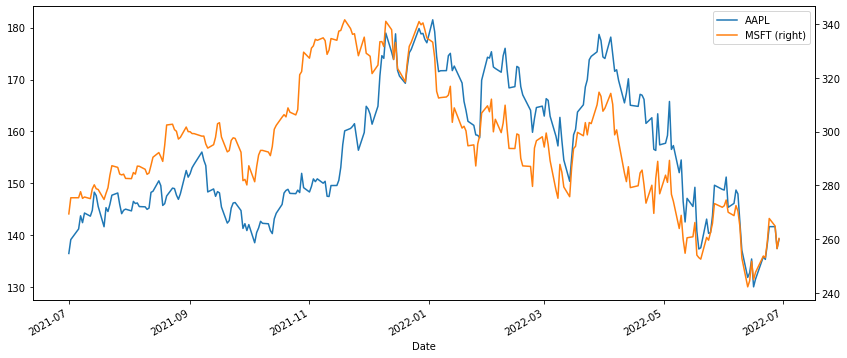

In [6]:
# use simply pandas plot to visualize the 
stock_data['Adj Close'].plot(secondary_y='MSFT', figsize=(14,6))

## Observation
When we review line plot we see that price movements b/w between AAPL and MSFT are similar.

## Correlation & Regression Analysis
While the plot seems to suggest so, let's analyze the log returns of the two stocks to see if there's a strong positive correlation b/w the two companies' returns...

In [7]:
# create a variable called returns to get the the log return data
returns = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))

In [8]:
returns.head()

,AAPL,MSFT
Date,,
2021-07-01,NaN,NaN
2021-07-02,0.019407,0.022031
2021-07-06,0.014611,0.000036
2021-07-07,0.017796,0.008142
2021-07-08,-0.009242,-0.009007


In [9]:
# let's get rid of any NaN's
returns.dropna(inplace=True)

In [10]:
returns.head(2).round(4)

,AAPL,MSFT
Date,,
2021-07-02,0.0194,0.022
2021-07-06,0.0146,0.000


## Plotting Log Returns
Let's plot a simple line chart of the log returns of the two stocks, MFST & AAPL.

<AxesSubplot:xlabel='Date'>

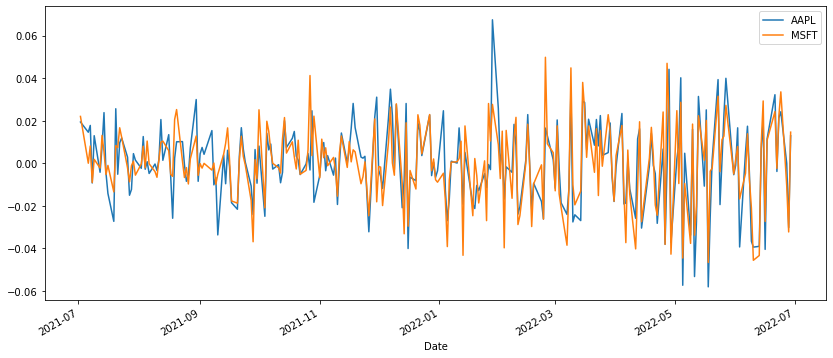

In [11]:
returns.plot(figsize=(14,6))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

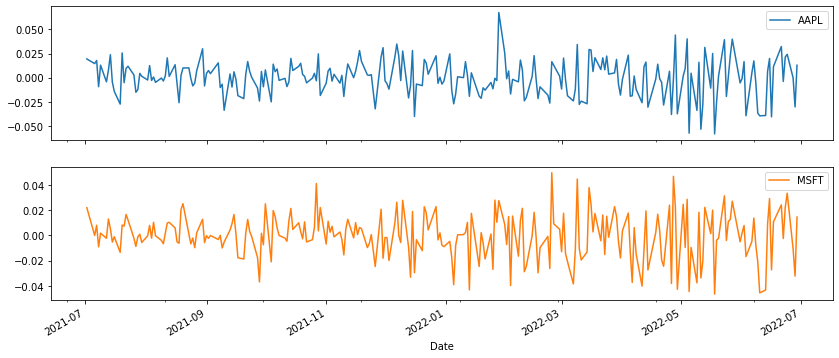

In [12]:
# let's use two subplots
returns.plot(subplots=True,figsize=(14,6))

From the subplots above, we can see the volatility pattern of the AAPL and MSFT shares quite a high degree of similarity. In general, there are periods of high volatility in AAPL where we see similar movement in MSFT.

## Examining Relationship b/x Log Returns
Let's plot the log returns together to see if any evidence of positive correlation exists.

array([[<AxesSubplot:xlabel='AAPL', ylabel='AAPL'>,
        <AxesSubplot:xlabel='MSFT', ylabel='AAPL'>],
       [<AxesSubplot:xlabel='AAPL', ylabel='MSFT'>,
        <AxesSubplot:xlabel='MSFT', ylabel='MSFT'>]], dtype=object)

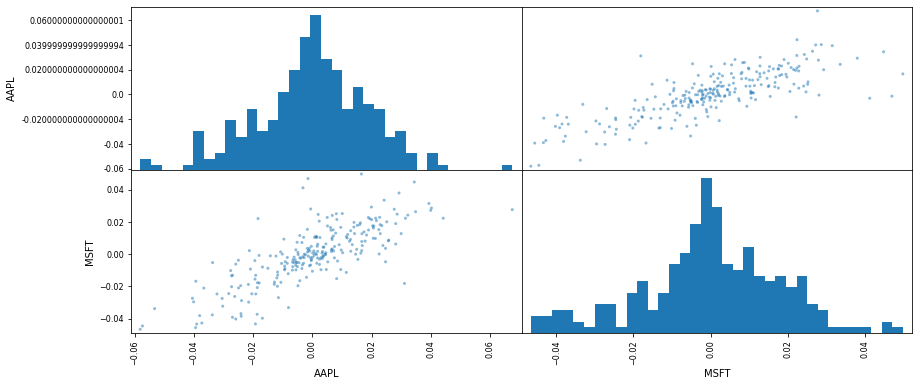

In [13]:
# 35 bins for the diagonal histogram
pd.plotting.scatter_matrix(returns, hist_kwds={'bins': 35}, figsize=(14,6))

We can see some positive direction in the return XY plots while both histograms seem to exhibit a similar pattern of skewness over the period.

## Ordinary least-square (OLS) Regression

Let's perform an ordinary least square (OLS) regression analysis on the stock returns of AAPL and MSFT. We will use the Numpy polyfit and polyval methods to do the OLS regression.

In [14]:
# np.polyfit() creates an array of Beta's that fit the regression eqn and minimizes
# least squares
regression = np.polyfit(returns['AAPL'], returns['MSFT'], deg=1)

In [15]:
regression

array([ 7.50197797e-01, -1.97706283e-04])

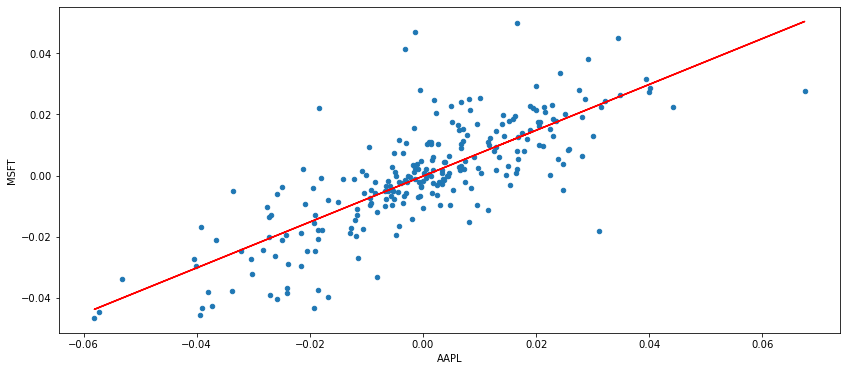

In [16]:
# let's plot the returns along with the regression line
ax = returns.plot(kind='scatter', x='AAPL',y='MSFT', figsize=(14,6))
ax.plot(returns['AAPL'], np.polyval(regression, returns['AAPL']),color='red')

We can see a positively sloped least squares regression fit line. This tells us there is evidence to suggest a positive correlation / relationship b/w the returns of the two stocks. This is not too far fetched given the two companies are big north america technology companies with similar products and services. Next, let's quantify this relationship even further by taking the correlation coefficient both cross-sectionally and over time.

## Correlation Analysis - Cross Sectional Analysis
Now we'll take a look at correlation statistic from two perspectives. The first perspective is to examine a single correlation statistic that takes the entire dataset into account (aka, a "cross-section") and another that provides a rolling correlation over a period of time (aka, a "time series"). 

In [17]:
# use the returns df and call the corr() method this will compute 
# the peason correlation coefficient, which has a range b/w -1 and 1 and
# is the most widely used correlation statistic
returns.corr()

,AAPL,MSFT
AAPL,1.000000,0.781652
MSFT,0.781652,1.000000


In [23]:
corr = returns.corr()
corr['AAPL'][1]

0.7816515875307013

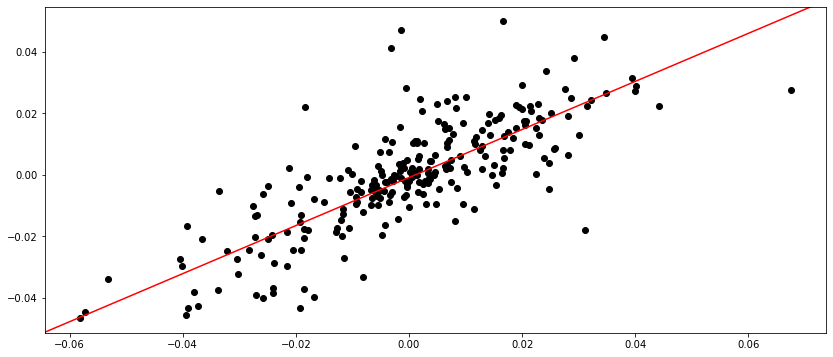

In [40]:
fig, ax = plt.subplots(figsize=(14,6))

# inputs to axline()
low_ = (-0.05, -0.04)
slope_ = corr['AAPL'][1]

ax.scatter(returns['AAPL'], returns['MSFT'], color='black')
plt.axline(xy1=low_, slope=slope_, color='r')

Above we see the correlation coefficient plotted against the scatter plot of returns. Recall that the slope of Beta 1 in a simple regression is equivalant to the peason correlation coefficient, so it's not surprising to see the regression plot from before and this plot looking very similar. 

## Correlation Analysis - Time Series Analysis
Let's next plot the rolling correlation coefficient using the in-built rolling method of dataframe. This will let us visualize changes to the correlation as time moves forward. It's logical to expect the rolling correlation to be close to (more or less) the all-in  cross-sectional correlation coefficient from above. It will be interesting to identify periods where the rolling correlation deviates from the overall correlation. Let's see...

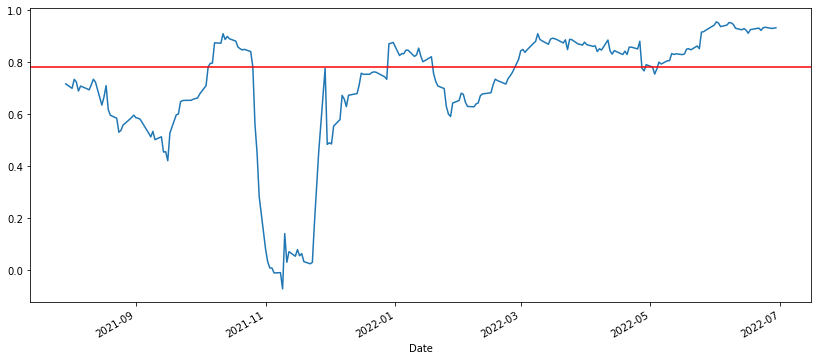

In [41]:
# we'll use AAPL as the reference company and use a window of 20 (~1 month of trading days)
# in our rolling correlation lookback period

# plot rolling correlation of returns b/w two companies
ax_rolling = returns['AAPL'].rolling(window=20).corr(returns['MSFT']).plot(figsize=(14,6))

# plot a red horizontal line to show the overall correlation over the year
ax_rolling.axhline(returns.corr().iloc[0,1], c='r')

## Summary
In our plot we see:
(a) the change in the rolling 20 day correlation over time, as well as 
(b) a red horizonatl line for the value of the static correlation coefficient over the time span 7/1/21 - 6/30/22. 

As can be seen, the rolling correlation moves around the overall correlation; sometimes above the overall level, sometimes below. Interestingly, in late 2021 (October/Novebmer), the rolling correlation decreased sharply and seemed to even dip below 0. It would be interesting to research what was happening with the two companies at this time and to gain some more insight into what might have caused such a stark change in correlation. 

Such a swing could present traders with an opportunity to profit from the change in correlation and/or from a subsequent reversion to normal levels. When utilizing a pairs trade strategy:
"The strategy monitors performance of two historically correlated securities. When the correlation between the two securities temporarily weakens, i.e. one stock moves up while the other moves down, the pairs trade would be to short the outperforming stock and to long the underperforming one, betting that the "spread" between the two would eventually converge."

Back to our example, if we're interested in a pairs arbitrage play, it would be very important to understand (and have a hypothesis) about why the correlation weakened between the two companies late 2021 / early 2022. 

Remember that correlation is a singular piece of statistical evidence. It's not indicative of a causal relationship between the two series. That said, it is a useful and fundamental data point that can be helpful when analyzing the relationship of returns between a benchmark and/or another company's returns series.

See more about pairs arbitrage trading here: https://en.wikipedia.org/wiki/Pairs_trade